In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import fnmatch
import os 
import xlrd
import re
path=r"C:\Users\ashis\OneDrive\Desktop\data science\eda assignment"
app=pd.read_csv(path+ "\\\\"+"application_data.csv")

In [224]:
path=r"C:\Users\ashis\OneDrive\Desktop\data science\eda assignment"
from pandas import ExcelWriter

In [225]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**cleaning data**

**check all the columns**

In [226]:
# find the total number of columns that have object data 
# find the total number of columns that have numerical data 

print("columns with numerical data - ",app.describe(include=["int","float"]).count().count() ,"\n","columns with object data - ",app.describe(include="object").count().count(),"\n","row and column",app.shape)

columns with numerical data -  106 
 columns with object data -  16 
 row and column (307511, 122)


In [227]:
app.describe(include=["int","float"])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [228]:
app.describe(include="object")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [229]:
# checking for null values 
((app.isnull().sum()/app.shape[0])*100).sort_values(ascending=False).head(48)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [230]:
app.APARTMENTS_MEDI.value_counts()

APARTMENTS_MEDI
0.0833    7109
0.0625    6687
0.0937    4622
0.0729    4211
0.0083    3562
          ... 
0.6225       1
0.7724       1
0.7234       1
0.8889       1
0.3024       1
Name: count, Length: 1148, dtype: int64

In [231]:
# removing all the nullvalues column with more than 40 percent null values 

In [232]:
app.drop(app[fnmatch.filter(app,"COMMONAREA*")],inplace=True,axis=1)

In [233]:
app.drop(app[fnmatch.filter(app,"NONLIVINGAPARTMENTS*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"LIVINGAPARTMENTS*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"FLOORSMIN*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"LANDAREA*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"BASEMENTAREA*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"NONLIVINGAREA*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"ELEVATORS*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"COMMONAREA*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"APARTMENTS*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"ENTRANCES*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"FLOORSMAX*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"LIVINGAREA*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"YEARS_BEGINEXPLUATATION*")],inplace=True,axis=1)
app.drop(app[fnmatch.filter(app,"TOTALAREA_MODE*")],inplace=True,axis=1)


In [234]:
app.drop(app[fnmatch.filter(app,"YEARS_BUILD*")],inplace=True,axis=1)

In [235]:
app.shape

(307511, 79)

In [236]:
(app.isnull().sum()/app.shape[0]*100).sort_values(ascending=False).head(48)

FONDKAPREMONT_MODE            68.386172
OWN_CAR_AGE                   65.990810
EXT_SOURCE_1                  56.381073
WALLSMATERIAL_MODE            50.840783
HOUSETYPE_MODE                50.176091
EMERGENCYSTATE_MODE           47.398304
OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000


In [237]:
# AMT_REQ_CREDIT_BUREAU checking on the values and how it is affecting the target 
# considering more than 6 enquiries as potential risk 
# adding all the enquiries together to get total enquiries done on the consumer new column =AMT_REQ_CREDIT_BUREAU_TOTAL

app["AMT_REQ_CREDIT_BUREAU_TOTAL"]=app[fnmatch.filter(app,"AMT_REQ_CREDIT_BUREAU*")].sum(axis=1)

In [238]:
app.drop(["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"],axis=1,inplace=True)


In [239]:
app.shape

(307511, 74)

In [240]:
## adding the columns that have document word in it 
### add them to a single column to reduce number of columns 
app["TOTAL_DOCUMENTS"]=app[fnmatch.filter(app,"*DOCUMENT*")].sum(axis=1)
app.drop(app[fnmatch.filter(app,"FLAG_DOCUMENT*")],axis=1,inplace=True)

In [241]:
app.shape

(307511, 55)

<Axes: >

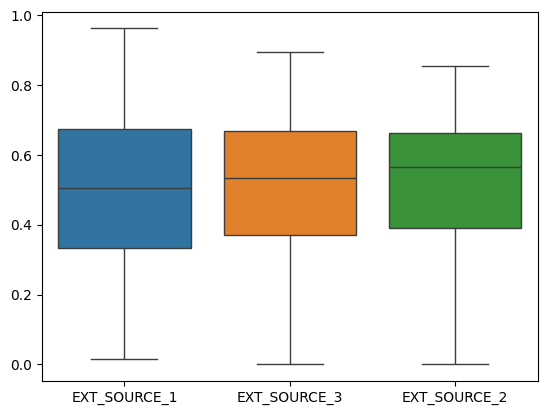

In [242]:
## it seems that all three external sources are related
## all three columns are linearly related
## so removing ext_source_1 and ext_source_3

sns.boxplot(app[["EXT_SOURCE_1","EXT_SOURCE_3","EXT_SOURCE_2"]])

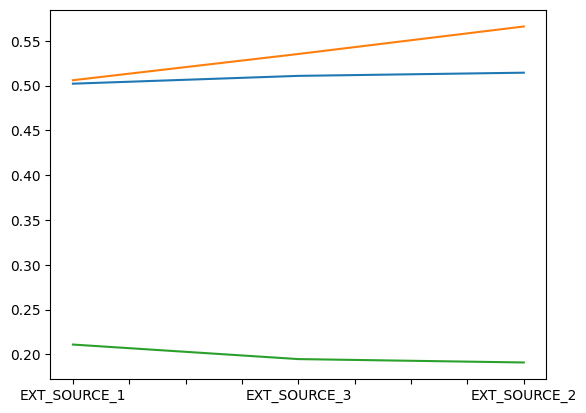

In [243]:
app[["EXT_SOURCE_1","EXT_SOURCE_3","EXT_SOURCE_2"]].mean().plot.line()
app[["EXT_SOURCE_1","EXT_SOURCE_3","EXT_SOURCE_2"]].median().plot.line()
app[["EXT_SOURCE_1","EXT_SOURCE_3","EXT_SOURCE_2"]].std().plot.line()
plt.show()

In [244]:
app[["EXT_SOURCE_1","EXT_SOURCE_3","EXT_SOURCE_2"]].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_3     60965
EXT_SOURCE_2       660
dtype: int64

In [245]:
app=app.drop(["EXT_SOURCE_1","EXT_SOURCE_3"],axis=1)

In [246]:
app.shape

(307511, 53)

In [247]:
# checking null values for columns with object data 
# dropping additional column from data 
(app.select_dtypes(include="object").isnull().sum()/app.shape[0]*100).sort_values()

NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
ORGANIZATION_TYPE              0.000000
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
EMERGENCYSTATE_MODE           47.398304
HOUSETYPE_MODE                50.176091
WALLSMATERIAL_MODE            50.840783
FONDKAPREMONT_MODE            68.386172
dtype: float64

In [248]:
app=app.drop(["FONDKAPREMONT_MODE"],axis=1)

<Axes: >

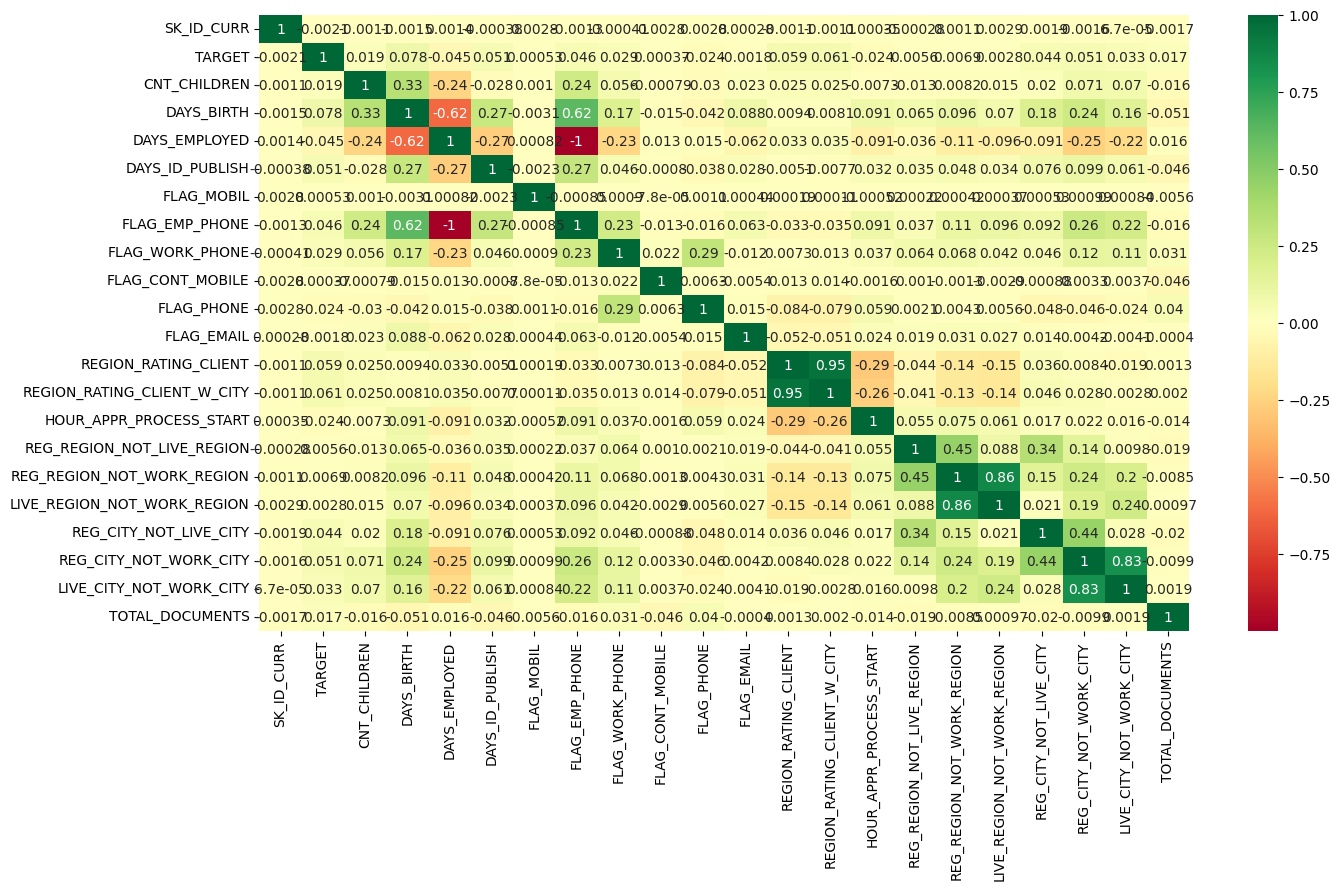

In [249]:
# checking correlation between different column 
# dividing the columns based on types of data int and float 
plt.figure(figsize=(15, 8))
sns.heatmap(app.select_dtypes(include="int").corr(),annot=True,cmap="RdYlGn")

In [250]:
# checking on columns that have observable defaulted information
# replacing the null values with mode 

In [251]:
app[fnmatch.filter(app,"*CNT_SOCIAL*")].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

In [252]:
app.DEF_30_CNT_SOCIAL_CIRCLE.mode()
app.OBS_30_CNT_SOCIAL_CIRCLE.mode()
app.OBS_60_CNT_SOCIAL_CIRCLE.mode()
app.DEF_60_CNT_SOCIAL_CIRCLE.mode()

0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [253]:
app["DEF_30_CNT_SOCIAL_CIRCLE"]=app["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0)
app["OBS_30_CNT_SOCIAL_CIRCLE"]=app["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0)
app["OBS_60_CNT_SOCIAL_CIRCLE"]=app["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0)
app["DEF_60_CNT_SOCIAL_CIRCLE"]=app["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0)

In [254]:
app[fnmatch.filter(app,"*CNT_SOCIAL*")].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [255]:
# checking null values of NAME_TYPE_SUITE
# adding mode to null values 
app.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [256]:
app.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_22584\3559974809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace=True)


In [257]:
# checking null values of HOUSETYPE_MODE
# adding mode to null values 
app.HOUSETYPE_MODE.value_counts(normalize=True)

HOUSETYPE_MODE
block of flats      0.982306
specific housing    0.009784
terraced house      0.007911
Name: proportion, dtype: float64

In [258]:
app.HOUSETYPE_MODE.fillna("block of flats",inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_22584\91025018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app.HOUSETYPE_MODE.fillna("block of flats",inplace=True)


In [259]:
# checking null values of OWN_CAR_AGE
# adding median to null values
app.OWN_CAR_AGE.median()

9.0

In [260]:
app.OWN_CAR_AGE.fillna(app.OWN_CAR_AGE.median(),inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_22584\2183880450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app.OWN_CAR_AGE.fillna(app.OWN_CAR_AGE.median(),inplace=True)


In [261]:
# checking null values of WALLSMATERIAL_MODE
# removing the data as it 50 percent and above
app.drop("WALLSMATERIAL_MODE",axis=1,inplace=True)

In [262]:
# leaving occupation type and emergency type 
app.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                         0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [263]:
# update birth days into years age
app["YEARS_BIRTH"]=app["DAYS_BIRTH"].apply(lambda x : (x*(-1))/365 if x<0 else (x*(1))/365)

In [264]:
# converting the data into int form 
app["YEARS_BIRTH"]=app["YEARS_BIRTH"].astype("int")

In [265]:
# update days employed
app["YEARS_EMPLOYED"]=app["DAYS_EMPLOYED"].apply(lambda x : (x*(-1))/365 if x<0 else (x*(1))/365)

In [266]:
# converting the data into int form 
app["YEARS_EMPLOYED"]=app["YEARS_EMPLOYED"].astype("int")

In [267]:
# dropping columns DAYS_EMPLOYED and DAYS_BIRTH
app.drop(["DAYS_EMPLOYED","DAYS_BIRTH"],axis=1,inplace=True)

In [268]:
# update dats of registration into years of registration 
# dropping DAYS_REGISTRATION
app["YEARS_REGISTRATION"]=app["DAYS_REGISTRATION"].apply(lambda x : (x*(-1))/365 if x<0 else (x*(1))/365)

In [269]:
#converting data into int form 
app["YEARS_REGISTRATION"]=app["YEARS_REGISTRATION"].astype("int")

In [270]:
app.drop(["DAYS_REGISTRATION"],axis=1,inplace=True)

In [271]:
app["YEARS_EMPLOYED"].describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

In [272]:
app["YEARS_EMPLOYED"].median()

6.0

In [273]:
app["YEARS_EMPLOYED"].quantile([0.75,0.80,0.819,0.82])

0.750      15.0
0.800      25.0
0.819      39.0
0.820    1000.0
Name: YEARS_EMPLOYED, dtype: float64

In [274]:
app["YEARS_EMPLOYED"].replace(1000,np.NaN,inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_22584\1922387622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app["YEARS_EMPLOYED"].replace(1000,np.NaN,inplace=True)


<Axes: >

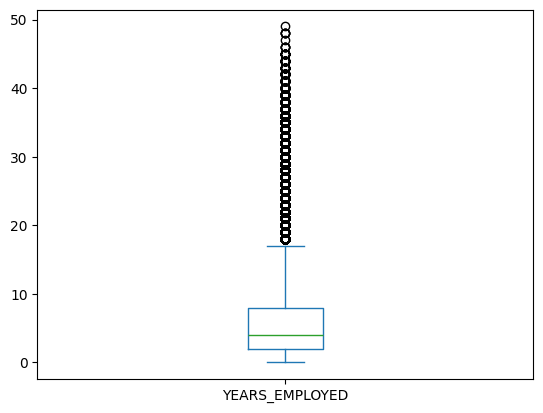

In [275]:
app.YEARS_EMPLOYED.plot.box()

In [276]:
# working on updating days of phone change data and convrting it to years and as an integer data 
app["YEARS_LAST_PHONE_CHANGE"]=app.DAYS_LAST_PHONE_CHANGE.apply(lambda x :(x*(-1))/365)
app.YEARS_LAST_PHONE_CHANGE.isnull().median()

0.0

In [277]:
app["YEARS_LAST_PHONE_CHANGE"].fillna(app.YEARS_LAST_PHONE_CHANGE.isnull().median(),inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_22584\4075368979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app["YEARS_LAST_PHONE_CHANGE"].fillna(app.YEARS_LAST_PHONE_CHANGE.isnull().median(),inplace=True)


In [278]:
app.YEARS_LAST_PHONE_CHANGE=app.YEARS_LAST_PHONE_CHANGE.astype("int")

In [279]:
app.YEARS_LAST_PHONE_CHANGE

0         3
1         2
2         2
3         1
4         3
         ..
307506    0
307507    0
307508    5
307509    0
307510    2
Name: YEARS_LAST_PHONE_CHANGE, Length: 307511, dtype: int32

In [280]:
app.drop("DAYS_LAST_PHONE_CHANGE",axis=1,inplace=True)

In [281]:
# converting DAYS_ID_PUBLISH into years and droping days_ID_publish

In [282]:
app.YEARS_ID_PUBLISH=app["DAYS_ID_PUBLISH"].apply(lambda x : (x*(-1))/365 if x<0 else (x*(1))/365)

C:\Users\ashis\AppData\Local\Temp\ipykernel_22584\1516136374.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  app.YEARS_ID_PUBLISH=app["DAYS_ID_PUBLISH"].apply(lambda x : (x*(-1))/365 if x<0 else (x*(1))/365)


In [283]:
app.YEARS_ID_PUBLISH=app.YEARS_ID_PUBLISH.astype("int")

In [284]:
app.YEARS_ID_PUBLISH

0          5
1          0
2          6
3          6
4          9
          ..
307506     5
307507    11
307508    14
307509     2
307510     1
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int32

In [285]:
app.drop("DAYS_ID_PUBLISH",axis=1,inplace=True)

**ANAlYSIS  OF DATA**

In [286]:
# choosing data with target 1 who have trouble making payment

In [287]:
app[app.TARGET==1]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_TOTAL,TOTAL_DOCUMENTS,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,1.0,1,25,1.0,9,3
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,10.0,1.0,10.0,0.0,4.0,2,51,7.0,18,0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,6.0,1,47,3.0,3,2
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1.0,0.0,1.0,0.0,2.0,1,36,9.0,0,4
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,1.0,1.0,0.0,1,67,NaN,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,...,0.0,0.0,0.0,0.0,2.0,1,27,8.0,23,0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,...,0.0,0.0,0.0,0.0,7.0,1,36,6.0,1,4
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,...,0.0,0.0,0.0,0.0,3.0,1,56,8.0,24,8
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,...,1.0,1.0,1.0,0.0,3.0,1,45,0.0,22,0


In [288]:
app[app.TARGET==1].select_dtypes(include="object").describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE
count,24825,24825,24825,24825,24825,24825,24825,24825,24825,18547,24825,24825,24825,11327
unique,2,2,2,2,7,6,5,5,6,18,7,58,3,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,No
freq,23221,14170,17249,16983,20407,15224,19524,14850,21272,5838,4501,6323,24570,11104


In [289]:
app[app.TARGET==1].select_dtypes(include="int").describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TOTAL_DOCUMENTS,YEARS_BIRTH,YEARS_REGISTRATION,YEARS_LAST_PHONE_CHANGE
count,24825.000000,24825.0,24825.000000,24825.0,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,...,24825.000000,24825.000000,24825.000000,24825.000000,24825.00000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000
mean,277449.167936,1.0,0.463807,1.0,0.879517,0.237825,0.998187,0.244955,0.055347,2.153635,...,0.017442,0.055911,0.042538,0.118389,0.30292,0.221672,0.950131,40.279960,11.802256,1.811118
std,102383.123458,0.0,0.756903,0.0,0.325532,0.425760,0.042538,0.430069,0.228662,0.505052,...,0.130914,0.229755,0.201817,0.323074,0.45953,0.415380,0.284004,11.484458,9.033503,2.002308
min,100002.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,189555.000000,1.0,0.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,31.000000,4.000000,0.000000
50%,276291.000000,1.0,0.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,39.000000,11.000000,1.000000
75%,366050.000000,1.0,1.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,49.000000,18.000000,3.000000
max,456254.000000,1.0,11.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,68.000000,62.000000,11.000000


In [290]:
app[app.TARGET==1].select_dtypes(include="float").describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_TOTAL,YEARS_EMPLOYED
count,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,24773.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,21835.000000
mean,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,10.424773,2.181269,0.410935,1.493978,0.191702,1.475529,0.138046,2.122578,4.479276
std,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,0.011905,7.231486,0.951327,0.213107,2.377394,0.516201,2.354870,0.427367,2.259206,5.074075
min,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000533,0.000000,1.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,0.009630,9.000000,2.000000,0.238568,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,0.018634,9.000000,2.000000,0.440381,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,0.025164,9.000000,3.000000,0.594190,2.000000,0.000000,2.000000,0.000000,3.000000,6.000000
max,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,0.072508,91.000000,13.000000,0.811870,30.000000,6.000000,29.000000,5.000000,22.000000,44.000000


In [291]:
app.shape

(307511, 50)

In [292]:
# choosing data with target 0  all other cases

In [293]:
app[app.TARGET==0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_TOTAL,TOTAL_DOCUMENTS,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_LAST_PHONE_CHANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,1,45,3.0,3,2
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0,52,0.0,11,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,0.0,1,52,8.0,26,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,1,54,8.0,11,3
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,2.0,1,46,4.0,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0.0,0.0,0.0,0.0,2.0,1,66,NaN,20,0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,1,25,0.0,23,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,1,56,NaN,12,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,6.0,0.0,3.0,1,41,21.0,18,5


In [294]:
app[app.TARGET==0].select_dtypes(include="object").describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE
count,282686,282686,282686,282686,282686,282686,282686,282686,282686,192573,282686,282686,282686,150429
unique,2,3,2,2,7,8,5,6,6,18,7,58,3,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,block of flats,No
freq,255011,188278,185675,196329,229411,143550,198867,181582,251596,49348,49400,61669,280230,148324


In [295]:
app[app.TARGET==0].select_dtypes(include="int").describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TOTAL_DOCUMENTS,YEARS_BIRTH,YEARS_REGISTRATION,YEARS_LAST_PHONE_CHANGE
count,282686.000000,282686.0,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,...,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000
mean,278244.744536,0.0,0.412946,0.999996,0.814653,0.195991,0.998129,0.284238,0.056840,2.043578,...,0.014942,0.050317,0.040494,0.074641,0.224090,0.175856,0.928401,43.713123,13.288681,2.261463
std,102825.776954,0.0,0.718843,0.001881,0.388579,0.396963,0.043219,0.451051,0.231538,0.508422,...,0.121323,0.218599,0.197114,0.262812,0.416982,0.380698,0.349038,11.955290,9.689666,2.205987
min,100003.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,189103.250000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.000000,5.000000,0.000000
50%,278362.500000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,12.000000,2.000000
75%,367241.500000,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54.000000,20.000000,4.000000
max,456255.000000,0.0,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,69.000000,67.000000,11.000000


In [296]:
app[app.TARGET==0].select_dtypes(include="float").describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_TOTAL,YEARS_EMPLOYED
count,2.826860e+05,2.826860e+05,282674.000000,2.824290e+05,282686.000000,282686.000000,282684.000000,2.820780e+05,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,230302.000000
mean,1.690777e+05,6.026483e+05,27163.623349,5.427368e+05,0.021021,10.007354,2.150154,5.234787e-01,1.410809,0.138663,1.394049,0.096351,2.147715,6.184697
std,1.104763e+05,4.068459e+05,14658.307178,3.737855e+05,0.013978,7.103951,0.906984,1.862767e-01,2.400119,0.439078,2.379069,0.355196,2.293621,6.509707
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,0.000000,1.000000,8.170000e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,9.000000,2.000000,4.097866e-01,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.485000e+05,5.177880e+05,24876.000000,4.500000e+05,0.018850,9.000000,2.000000,5.739047e-01,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
75%,2.025000e+05,8.100000e+05,34749.000000,6.885000e+05,0.028663,9.000000,3.000000,6.677051e-01,2.000000,0.000000,2.000000,0.000000,3.000000,8.000000
max,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,91.000000,20.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000,262.000000,49.000000


In [297]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_TOTAL,TOTAL_DOCUMENTS,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,1.0,1,25,1.0,9,3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,1,45,3.0,3,2
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0,52,0.0,11,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,0.0,1,52,8.0,26,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,1,54,8.0,11,3


**VISUAL ANALYSIS**

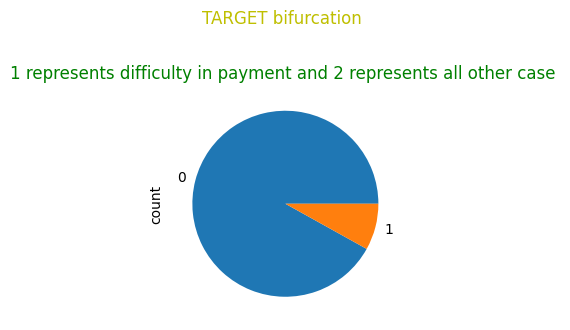

In [298]:
(app.TARGET).value_counts().plot.pie(figsize=(3,4))
plt.title("1 represents difficulty in payment and 2 represents all other case ",fontdict={"color":"g"})
plt.suptitle("TARGET bifurcation",fontdict={"color":"y"})

plt.show()

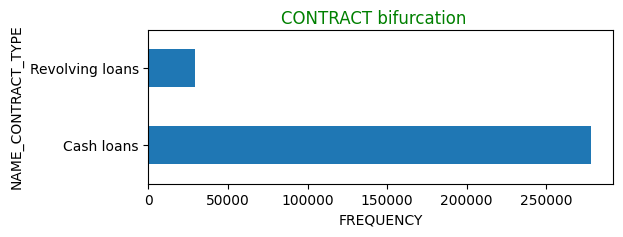

In [299]:
app.NAME_CONTRACT_TYPE.value_counts().plot.barh(figsize=(6,2))
plt.xlabel("FREQUENCY")
plt.suptitle("CONTRACT bifurcation",fontdict={"color":"g"})
plt.show()

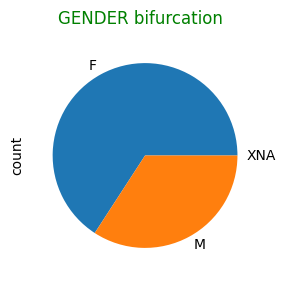

In [300]:
app.CODE_GENDER.value_counts().plot.pie(figsize=(4,3))
plt.suptitle("GENDER bifurcation",fontdict={"color":"g"})
plt.show()

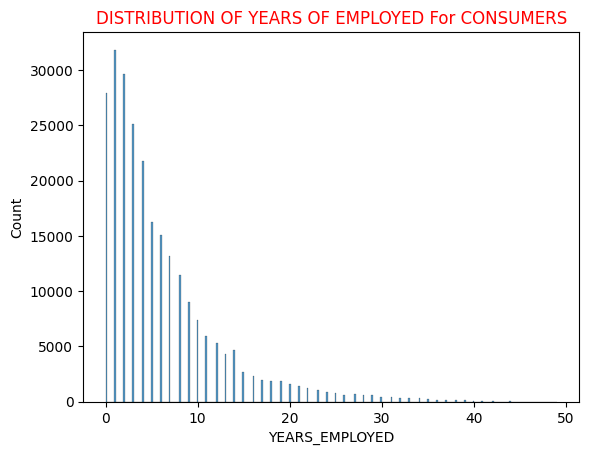

In [301]:
sns.histplot(app.YEARS_EMPLOYED)
plt.title("DISTRIBUTION OF YEARS OF EMPLOYED For CONSUMERS",fontdict={"color":"r"})
plt.show()

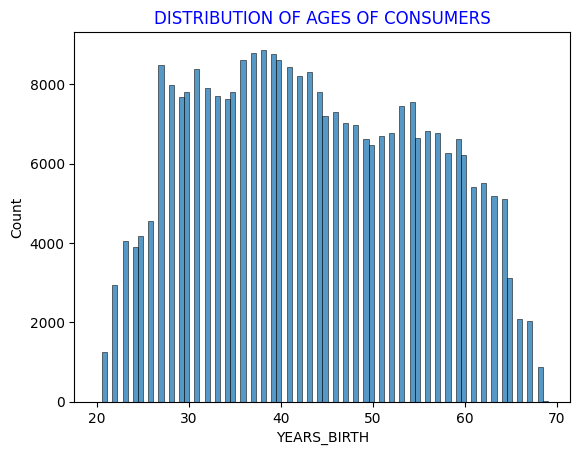

In [302]:
sns.histplot(app.YEARS_BIRTH)
plt.title("DISTRIBUTION OF AGES OF CONSUMERS",fontdict={"color":"b"})
plt.show()

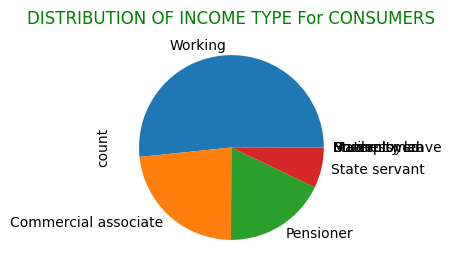

In [303]:
app.NAME_INCOME_TYPE.value_counts().plot.pie(figsize=(4,3))
plt.title("DISTRIBUTION OF INCOME TYPE For CONSUMERS",fontdict={"color":"g"})
plt.show()

In [304]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'HOUSETYPE_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_

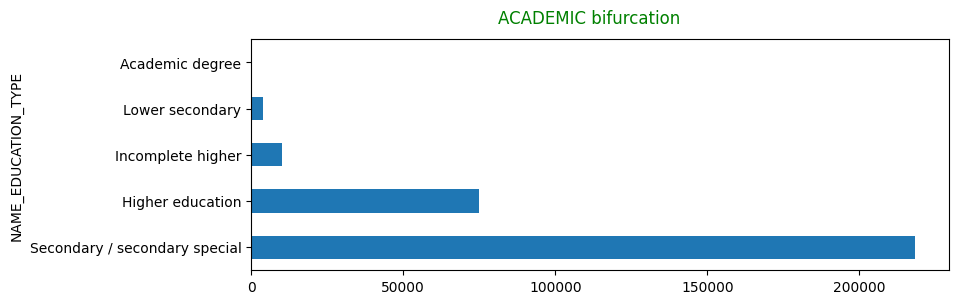

In [305]:
app.NAME_EDUCATION_TYPE.value_counts().plot.barh(figsize=(9,3))
plt.suptitle("ACADEMIC bifurcation",fontdict={"color":"g"})
plt.show()

<Axes: >

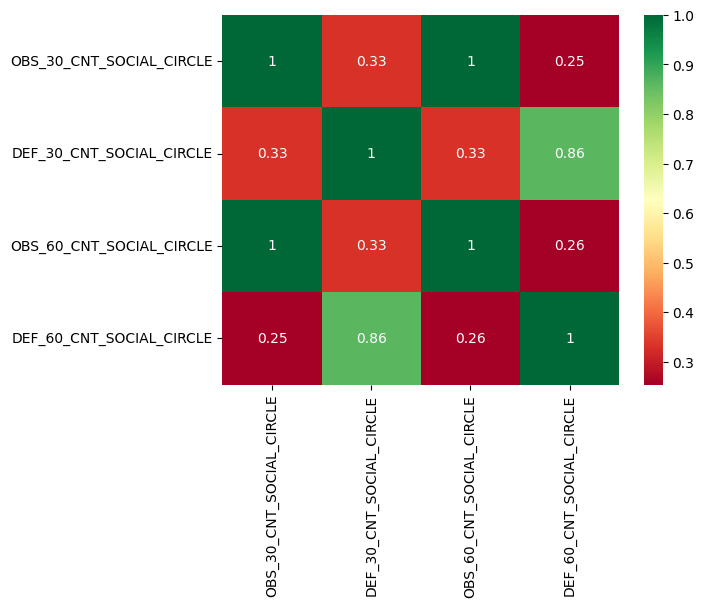

In [306]:
sns.heatmap(app[fnmatch.filter(app,"*SOCIAL_CIRCLE*")].corr(),annot=True,cmap="RdYlGn")

In [307]:
# since  DEF 30 is directly replated to DEF 60 and OBS 30 is related to OBS 60 
## taking DEF 60 and OBS 60 

In [308]:
app.groupby("TARGET")[["OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]].mean()

,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
TARGET,,
0,1.394049,0.096351
1,1.475529,0.138046


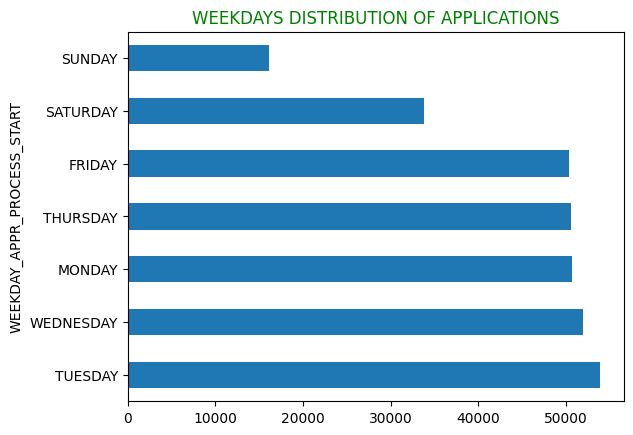

In [309]:
app["WEEKDAY_APPR_PROCESS_START"].value_counts().plot.barh(5,3)
plt.title("WEEKDAYS DISTRIBUTION OF APPLICATIONS",fontdict={"color":"g"})
plt.show()

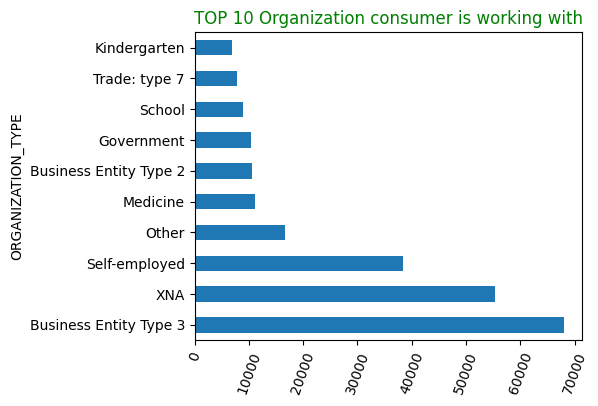

In [310]:
app.ORGANIZATION_TYPE.value_counts(
).head(10).plot.barh(figsize=(5,4))
plt.xticks(rotation=70)
plt.title("TOP 10 Organization consumer is working with",fontdict={"color":"g"})
plt.show()

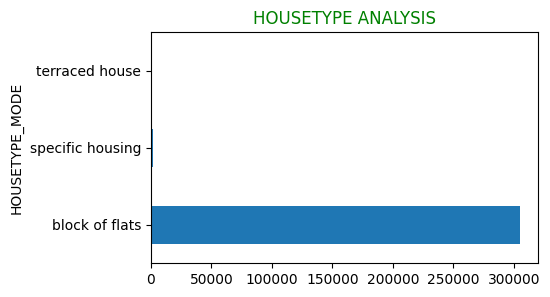

In [311]:
# most loans are purchased by flat owners 
app.HOUSETYPE_MODE.value_counts().plot.barh(figsize=(5,3))
plt.title("HOUSETYPE ANALYSIS",fontdict={"color":"g"})
plt.show()

**----------------------------------------------------------------------------------------------- Next file **

**ANALYSIS OF PREVIOUS APPLICATION**

In [312]:
prev_app=pd.read_csv(path+ "\\\\"+"previous_application.csv")

In [313]:
prev_app.shape

(1670214, 37)

In [314]:
# checking null values in columns
prev_app.isnull().sum()/prev_app.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [315]:
# trying to remove columns all columns with more than 40 percent null values 

In [316]:
prev_app.drop(["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY","RATE_DOWN_PAYMENT","AMT_DOWN_PAYMENT","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"],axis=1,inplace=True)

In [317]:
prev_app.isnull().sum()/prev_app.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [318]:
# taking care of NAME_TYPE_SUITE
prev_app.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [319]:
# filling null data with mode 
prev_app["NAME_TYPE_SUITE"].fillna("Unaccompanied",inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_22584\3095298017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prev_app["NAME_TYPE_SUITE"].fillna("Unaccompanied",inplace=True)


In [320]:
prev_app.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                     0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [321]:
prev_app.CNT_PAYMENT.describe().astype(int)

count    1297984
mean          16
std           14
min            0
25%            6
50%           12
75%           24
max           84
Name: CNT_PAYMENT, dtype: int32

In [322]:
prev_app["COUNT"]=prev_app.SK_ID_CURR.value_counts()

In [323]:
# adding a new column by changing name_contract_status

In [324]:
# options to be used to find eligible consumers :
# 1. Approved
# 2. Refused
# 3. Canceled 
# 4. Unused offer  

prev_app["NAME_CONTRACT_STATUS_num"]=prev_app["NAME_CONTRACT_STATUS"].apply(lambda x : 4 if x=="Unused offer" else 3 if x=="Canceled" else 2 if x=="Refused" else 1 if x=="Approved" else np.NaN)

In [325]:
prev_app["NAME_CONTRACT_STATUS_num"]=prev_app["NAME_CONTRACT_STATUS_num"].astype("int")

In [326]:
prev_app.SK_ID_CURR.value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: count, Length: 338857, dtype: int64

In [327]:
# data grouping on object
prev_app_object=prev_app.groupby(['SK_ID_CURR'])[["NAME_CONTRACT_TYPE",'WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',"CHANNEL_TYPE",'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']].agg(pd.Series.mode)

In [328]:
prev_app_num=prev_app.groupby(['SK_ID_CURR'])[["COUNT","NAME_CONTRACT_STATUS_num",'HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',"CNT_PAYMENT"]].agg(pd.Series.mean)

In [329]:
prev_app_num["NAME_CONTRACT_STATUS_num"]=prev_app_num["NAME_CONTRACT_STATUS_num"].astype("int")

In [330]:
fnmatch.filter(prev_app,"DAYS*")

['DAYS_DECISION']

In [331]:
# changing days if decusion into years if decision
prev_app.YEARS_DECISION=prev_app["DAYS_DECISION"].apply(lambda x : (x*(-1))/365 if x<0 else (x*(1))/365)

C:\Users\ashis\AppData\Local\Temp\ipykernel_22584\1956317363.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  prev_app.YEARS_DECISION=prev_app["DAYS_DECISION"].apply(lambda x : (x*(-1))/365 if x<0 else (x*(1))/365)


In [332]:
prev_app.YEARS_DECISION=prev_app.YEARS_DECISION.astype("int")

In [333]:
prev_app.drop("DAYS_DECISION",axis=1,inplace=True)

In [334]:
prev_app.shape

(1670214, 28)

**"------------------------------------------------------------------------------------------MERGED FILE INFORMATION**

In [335]:
# merging app file with the three variant of prev_app files 

In [336]:
prev_app_object.shape

(338857, 15)

In [337]:
file1=pd.merge(app,prev_app_object,on="SK_ID_CURR",how="left")

In [338]:
file2=pd.merge(file1,prev_app_num,on="SK_ID_CURR",how="left")

In [339]:
file2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'HOUSETYPE_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 

In [340]:
# checking on data who have paymment difficulty 
file1[file1["TARGET"]==1][["NAME_CONTRACT_TYPE_x","NAME_CONTRACT_TYPE_y","NAME_CONTRACT_STATUS","CODE_GENDER"]]

,NAME_CONTRACT_TYPE_x,NAME_CONTRACT_TYPE_y,NAME_CONTRACT_STATUS,CODE_GENDER
0,Cash loans,Consumer loans,Approved,M
26,Cash loans,NaN,NaN,F
40,Cash loans,Cash loans,Approved,M
42,Cash loans,Consumer loans,Approved,F
81,Cash loans,NaN,NaN,F
...,...,...,...,...
307448,Cash loans,Cash loans,Canceled,M
307475,Cash loans,Cash loans,Approved,F
307481,Cash loans,Cash loans,Refused,M
307489,Cash loans,"[Consumer loans, Revolving loans]",Approved,F


<Axes: ylabel='NAME_CONTRACT_STATUS'>

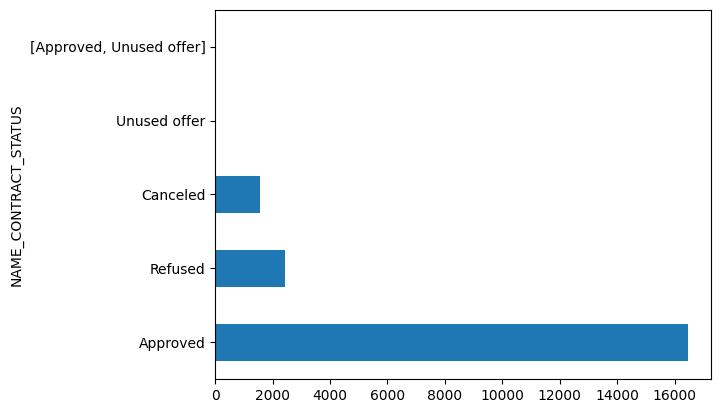

In [341]:
# checking on application that have difficulty paying 
file1[file1["TARGET"]==1]["NAME_CONTRACT_STATUS"].value_counts().head(5).plot.barh()

In [342]:
# with the help of prev history we can convert the consumers that have payment difficutlies and can approve them 
consumers_that_can_be_converted=file1[file1["TARGET"]==1]["NAME_CONTRACT_STATUS"].value_counts().head(5)

In [343]:
# data shows that 80 percent who have payment difficulties can be converted basede on previous recoords 
consumers_that_can_be_converted/consumers_that_can_be_converted.sum()*100

NAME_CONTRACT_STATUS
Approved                    80.295855
Refused                     11.839086
Canceled                     7.635600
Unused offer                 0.224576
[Approved, Unused offer]     0.004882
Name: count, dtype: float64

In [344]:
# checking on data who dont have payment difficulty 
file1[file1["TARGET"]==0][["NAME_CONTRACT_TYPE_x","NAME_CONTRACT_TYPE_y","NAME_CONTRACT_STATUS","CODE_GENDER"]]

,NAME_CONTRACT_TYPE_x,NAME_CONTRACT_TYPE_y,NAME_CONTRACT_STATUS,CODE_GENDER
1,Cash loans,Consumer loans,Approved,F
2,Revolving loans,Consumer loans,Approved,M
3,Cash loans,Cash loans,Approved,F
4,Cash loans,Cash loans,Approved,M
5,Cash loans,Consumer loans,Approved,M
...,...,...,...,...
307505,Cash loans,"[Cash loans, Consumer loans]","[Approved, Refused]",F
307506,Cash loans,Consumer loans,Approved,M
307507,Cash loans,Consumer loans,Approved,F
307508,Cash loans,Consumer loans,Approved,F


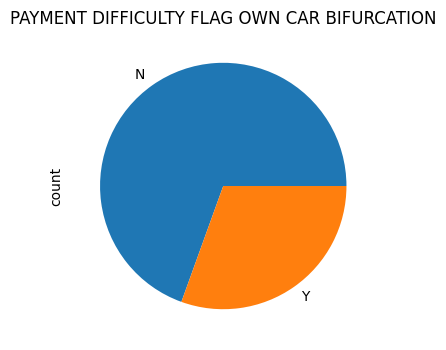

In [345]:
file2[file2["TARGET"]==1].FLAG_OWN_CAR.value_counts().plot.pie(figsize=(4,4))
plt.title("PAYMENT DIFFICULTY FLAG OWN CAR BIFURCATION")
plt.show()

In [346]:
file2[file2["TARGET"]==1][["OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]].quantile([0,0.25,0.50,0.75,0.90,0.93,0.94,0.96,0.98])

,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0.00,0.0,0.0
0.25,0.0,0.0
0.50,0.0,0.0
0.75,2.0,0.0
0.90,5.0,1.0
0.93,5.0,1.0
0.94,6.0,1.0
0.96,7.0,1.0
0.98,9.0,2.0


In [347]:
file2[file2["TARGET"]==0][["OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]].quantile([0,0.25,0.50,0.75,0.90,0.93,0.94,0.96,0.98])

,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0.00,0.0,0.0
0.25,0.0,0.0
0.50,0.0,0.0
0.75,2.0,0.0
0.90,4.0,0.0
0.93,5.0,1.0
0.94,6.0,1.0
0.96,7.0,1.0
0.98,8.0,1.0


In [348]:
file2[file2["TARGET"]==1].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,...,NAME_CONTRACT_STATUS_num,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT
count,24825.000000,24825.0,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.0,...,23845.000000,23845.000000,23845.000000,23845.000000,23845.000000,23823.000000,2.384500e+04,2.384500e+04,2.379000e+04,23823.000000
mean,277449.167936,1.0,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,10.424773,1.0,...,1.201761,12.327772,0.997294,-828.933454,325.789777,13364.183497,1.428173e+05,1.611298e+05,1.836861e+05,15.312572
std,102383.123458,0.0,0.756903,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,0.011905,7.231486,0.0,...,0.407957,2.803952,0.027053,565.919851,1419.302656,8802.324162,1.413683e+05,1.565810e+05,1.813741e+05,9.077831
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000533,0.000000,1.0,...,1.000000,2.333333,0.000000,-2922.000000,-1.000000,876.060000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,189555.000000,1.0,0.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,0.009630,9.000000,1.0,...,1.000000,10.500000,1.000000,-1105.000000,19.200000,7314.960000,5.625450e+04,6.175899e+04,6.863119e+04,9.000000
50%,276291.000000,1.0,0.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,0.018634,9.000000,1.0,...,1.000000,12.400000,1.000000,-673.000000,58.500000,11250.000000,9.864675e+04,1.116405e+05,1.229775e+05,12.000000
75%,366050.000000,1.0,1.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,0.025164,9.000000,1.0,...,1.000000,14.142857,1.000000,-398.166667,265.000000,17082.266250,1.780560e+05,2.059628e+05,2.340000e+05,20.000000
max,456254.000000,1.0,11.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,0.072508,91.000000,1.0,...,4.000000,22.000000,1.000000,-3.000000,74625.000000,114885.630000,2.148750e+06,2.402685e+06,3.150000e+06,64.000000


In [349]:
round((file2[file1["TARGET"]==0].describe()),2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,...,NAME_CONTRACT_STATUS_num,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT
count,282686.00,282686.0,282686.00,282686.00,282686.00,282674.00,282429.00,282686.00,282686.00,282686.0,...,267212.00,267212.00,267212.00,267212.00,267212.00,266817.00,267212.00,267212.00,266292.00,266819.00
mean,278244.74,0.0,0.41,169077.72,602648.28,27163.62,542736.80,0.02,10.01,1.0,...,1.16,12.69,1.00,-927.66,420.91,14636.33,155003.88,170867.81,194808.03,14.46
std,102825.78,0.0,0.72,110476.27,406845.91,14658.31,373785.49,0.01,7.10,0.0,...,0.38,2.77,0.03,578.12,11182.84,10101.55,154267.56,166506.73,193519.38,8.36
min,100003.00,0.0,0.00,25650.00,45000.00,1615.50,40500.00,0.00,0.00,0.0,...,1.00,0.00,0.00,-2922.00,-1.00,0.00,0.00,0.00,0.00,0.00
25%,189103.25,0.0,0.00,112500.00,270000.00,16456.50,238500.00,0.01,9.00,1.0,...,1.00,11.00,1.00,-1258.50,23.67,7879.74,62423.81,67256.20,74029.50,9.00
50%,278362.50,0.0,0.00,148500.00,517788.00,24876.00,450000.00,0.02,9.00,1.0,...,1.00,12.80,1.00,-799.50,80.33,12050.73,106726.16,118055.70,129150.00,12.00
75%,367241.50,0.0,1.00,202500.00,810000.00,34749.00,688500.00,0.03,9.00,1.0,...,1.00,14.50,1.00,-474.00,358.33,18444.79,192523.24,217115.96,245947.88,18.00
max,456255.00,0.0,19.00,18000090.00,4050000.00,258025.50,4050000.00,0.07,91.00,1.0,...,4.00,23.00,1.00,-2.00,4000000.00,300425.44,4050000.00,4050000.00,4050000.00,72.00


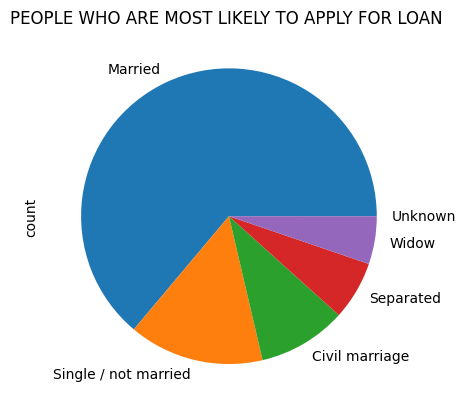

In [350]:
(file2["NAME_FAMILY_STATUS"].value_counts()/file1.shape[0]*100).plot.pie()
plt.title("PEOPLE WHO ARE MOST LIKELY TO APPLY FOR LOAN ")
plt.show()

In [351]:
file2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'HOUSETYPE_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 

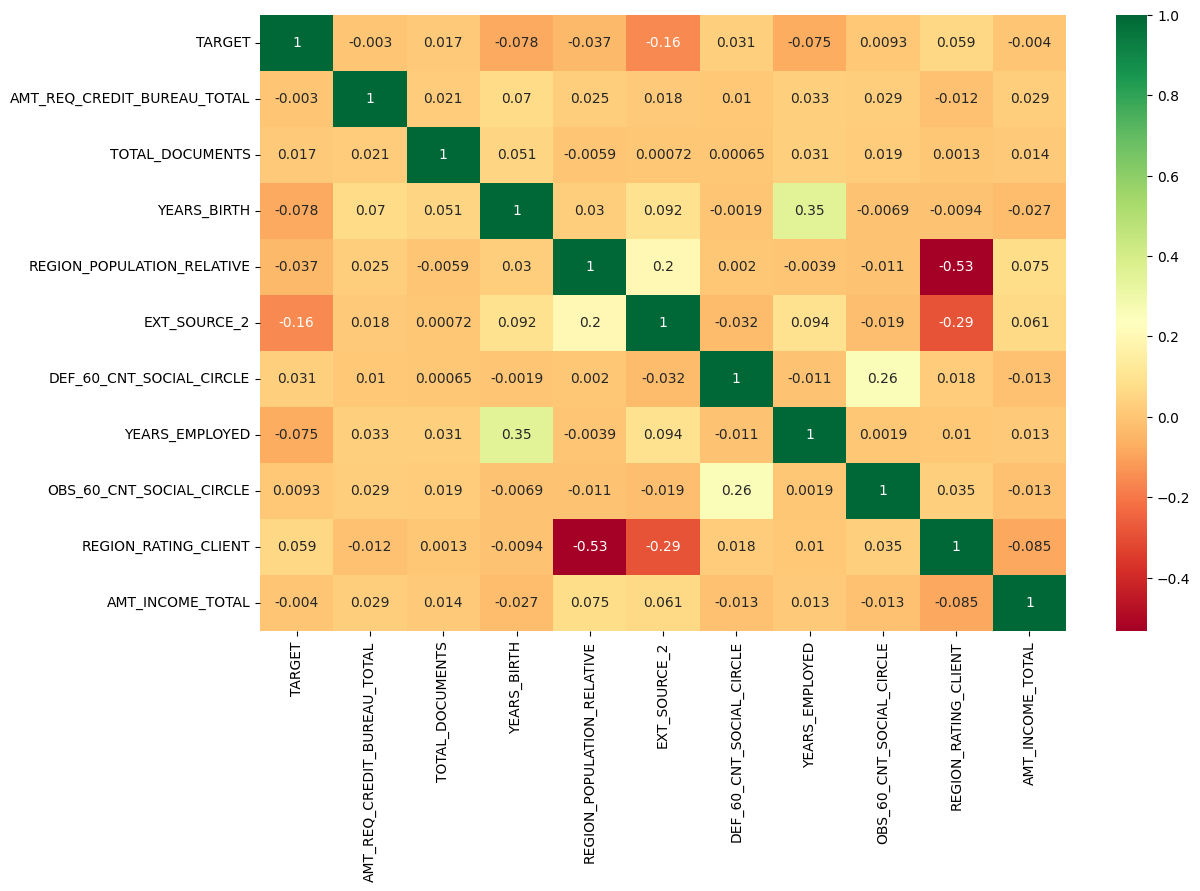

In [352]:
# checking on different correlation 
plt.figure(figsize=(13, 8))
sns.heatmap(file2[["TARGET",'AMT_REQ_CREDIT_BUREAU_TOTAL','TOTAL_DOCUMENTS', 'YEARS_BIRTH',"REGION_POPULATION_RELATIVE","EXT_SOURCE_2","DEF_60_CNT_SOCIAL_CIRCLE","YEARS_EMPLOYED","OBS_60_CNT_SOCIAL_CIRCLE","REGION_RATING_CLIENT","AMT_INCOME_TOTAL"]].corr(), annot= True, cmap= "RdYlGn")
plt.show()

In [353]:
file1_2=file1.groupby("TARGET")[["TARGET","AMT_CREDIT",'AMT_REQ_CREDIT_BUREAU_TOTAL', 'TOTAL_DOCUMENTS', 'YEARS_BIRTH',"REGION_POPULATION_RELATIVE","AMT_ANNUITY","EXT_SOURCE_2","AMT_GOODS_PRICE","DEF_60_CNT_SOCIAL_CIRCLE","YEARS_EMPLOYED","OBS_60_CNT_SOCIAL_CIRCLE","REGION_RATING_CLIENT","AMT_INCOME_TOTAL"]].mean()

In [354]:
round(file1_2,2)

,TARGET,AMT_CREDIT,AMT_REQ_CREDIT_BUREAU_TOTAL,TOTAL_DOCUMENTS,YEARS_BIRTH,REGION_POPULATION_RELATIVE,AMT_ANNUITY,EXT_SOURCE_2,AMT_GOODS_PRICE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_EMPLOYED,OBS_60_CNT_SOCIAL_CIRCLE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL
TARGET,,,,,,,,,,,,,,
0,0.0,602648.28,2.15,0.93,43.71,0.02,27163.62,0.52,542736.80,0.10,6.18,1.39,2.04,169077.72
1,1.0,557778.53,2.12,0.95,40.28,0.02,26481.74,0.41,488972.41,0.14,4.48,1.48,2.15,165611.76


In [355]:
# keeping the columns as null not adding emergency state mode because it will change target info 
#,not changing occupation type as it can change the amount provided 
# not changing EXT_source as it can affect TARGET 
file2.isnull().sum().sort_values(ascending=False)

EMERGENCYSTATE_MODE        145755
COUNT                      143916
OCCUPATION_TYPE             96391
YEARS_EMPLOYED              55374
AMT_GOODS_PRICE_y           17429
                            ...  
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
HOUSETYPE_MODE                  0
Length: 76, dtype: int64

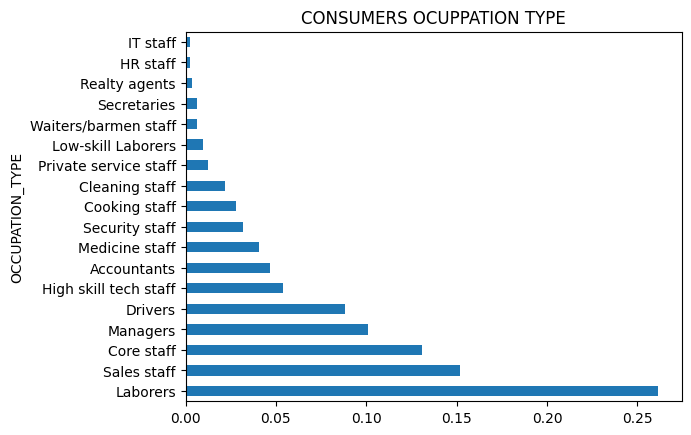

In [356]:
file2.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title("CONSUMERS OCUPPATION TYPE")
plt.show()

In [357]:
file2.OCCUPATION_TYPE.value_counts(normalize=True).head()

OCCUPATION_TYPE
Laborers       0.261396
Sales staff    0.152056
Core staff     0.130589
Managers       0.101227
Drivers        0.088116
Name: proportion, dtype: float64

In [358]:
(file2.isnull().sum()/file2.shape[0]*100).sort_values(ascending=False)

EMERGENCYSTATE_MODE        47.398304
COUNT                      46.800277
OCCUPATION_TYPE            31.345545
YEARS_EMPLOYED             18.007161
AMT_GOODS_PRICE_y           5.667765
                             ...    
REG_CITY_NOT_LIVE_CITY      0.000000
REG_CITY_NOT_WORK_CITY      0.000000
LIVE_CITY_NOT_WORK_CITY     0.000000
ORGANIZATION_TYPE           0.000000
HOUSETYPE_MODE              0.000000
Length: 76, dtype: float64

In [359]:
round(file2[file2.TARGET==1].select_dtypes(include=["int","float"]).mean())

SK_ID_CURR                     277449.0
TARGET                              1.0
CNT_CHILDREN                        0.0
AMT_INCOME_TOTAL               165612.0
AMT_CREDIT_x                   557779.0
AMT_ANNUITY_x                   26482.0
AMT_GOODS_PRICE_x              488972.0
REGION_POPULATION_RELATIVE          0.0
OWN_CAR_AGE                        10.0
FLAG_MOBIL                          1.0
FLAG_EMP_PHONE                      1.0
FLAG_WORK_PHONE                     0.0
FLAG_CONT_MOBILE                    1.0
FLAG_PHONE                          0.0
FLAG_EMAIL                          0.0
CNT_FAM_MEMBERS                     2.0
REGION_RATING_CLIENT                2.0
REGION_RATING_CLIENT_W_CITY         2.0
HOUR_APPR_PROCESS_START_x          12.0
REG_REGION_NOT_LIVE_REGION          0.0
REG_REGION_NOT_WORK_REGION          0.0
LIVE_REGION_NOT_WORK_REGION         0.0
REG_CITY_NOT_LIVE_CITY              0.0
REG_CITY_NOT_WORK_CITY              0.0
LIVE_CITY_NOT_WORK_CITY             0.0


In [360]:
file2[file2.TARGET==1][['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']].mode()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE
0,1,Cash loans,F,N,Y,0,135000.0,450000.0,9000.0,450000.0,...,House / apartment,0.035792,9.0,1,1,0,1,0,0,Laborers


In [362]:
file2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'HOUSETYPE_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 

In [363]:
# checking people with payment difficulty and to see what can be done 
# 1. Approved
# 2. Refused
# 3. Canceled 
# 4. Unused offer 
# taking anyone who has credit bureau check 6 and above nas risk

In [364]:
file2[(file2["TARGET"]==1) & (file2["NAME_CONTRACT_STATUS_num"]==1) &(file2["AMT_REQ_CREDIT_BUREAU_TOTAL"]<6)][["NAME_CONTRACT_STATUS_num","AMT_CREDIT_x","AMT_CREDIT_y","AMT_ANNUITY_x","AMT_ANNUITY_y","AMT_GOODS_PRICE_x","AMT_GOODS_PRICE_y","AMT_REQ_CREDIT_BUREAU_TOTAL","EXT_SOURCE_2"]].mean()

NAME_CONTRACT_STATUS_num            1.000000
AMT_CREDIT_x                   559779.867942
AMT_CREDIT_y                   159144.939283
AMT_ANNUITY_x                   26618.962835
AMT_ANNUITY_y                   12620.232945
AMT_GOODS_PRICE_x              491174.126322
AMT_GOODS_PRICE_y              163099.945331
AMT_REQ_CREDIT_BUREAU_TOTAL         1.563740
EXT_SOURCE_2                        0.409225
dtype: float64

<Axes: >

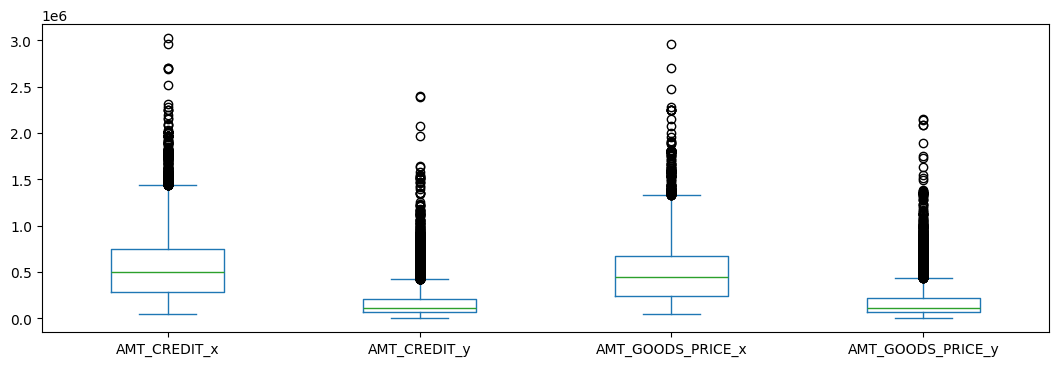

In [365]:
file2[(file2["TARGET"]==1) & (file2["NAME_CONTRACT_STATUS_num"]==1)][["AMT_CREDIT_x","AMT_CREDIT_y","AMT_GOODS_PRICE_x","AMT_GOODS_PRICE_y"]].plot.box(figsize=(13,4))

In [366]:
file2[(file2["TARGET"]==1) & (file2["NAME_CONTRACT_STATUS_num"]==1) &(file2["AMT_REQ_CREDIT_BUREAU_TOTAL"]<6)][["NAME_CONTRACT_STATUS_num","AMT_CREDIT_x","AMT_CREDIT_y","AMT_ANNUITY_x","AMT_ANNUITY_y","AMT_GOODS_PRICE_x","AMT_GOODS_PRICE_y","AMT_REQ_CREDIT_BUREAU_TOTAL","EXT_SOURCE_2"]]

,NAME_CONTRACT_STATUS_num,AMT_CREDIT_x,AMT_CREDIT_y,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,AMT_REQ_CREDIT_BUREAU_TOTAL,EXT_SOURCE_2
0,1.0,406597.5,179055.00,24700.5,9251.7750,351000.0,179055.00,1.0,0.262949
42,1.0,288873.0,55715.40,16258.5,5747.8590,238500.0,44502.75,2.0,0.674203
94,1.0,953460.0,115589.25,64107.0,12261.8025,900000.0,105652.50,2.0,0.432340
110,1.0,723996.0,114842.25,30802.5,11883.3300,585000.0,104991.75,0.0,0.282069
180,1.0,540000.0,38424.00,27000.0,8456.5800,540000.0,61224.75,2.0,0.372110
...,...,...,...,...,...,...,...,...,...
307438,1.0,1436850.0,228102.75,42142.5,15677.0550,1125000.0,205827.75,3.0,0.727863
307446,1.0,900000.0,57068.82,40671.0,15750.3300,900000.0,106089.93,0.0,0.348737
307481,1.0,297000.0,345508.20,19975.5,20439.2700,297000.0,315000.00,3.0,0.713524
307489,1.0,521280.0,67725.00,23089.5,5682.7800,450000.0,63405.00,3.0,0.615261


In [367]:
# it seems there are around 17799 consumers who can still be given loan based on prev application
# provided their loan values are reduced 

**--------------------------------------------------NEXT ANALYSIS-----------------------------------**

In [368]:
# checking people without payment difficulty 
# 1. Approved
# 2. Refused
# 3. Canceled 
# 4. Unused offer
# taking anyone who has credit bureau check 6 and above nas risk
file2[(file2["TARGET"]==0) & (file2["NAME_CONTRACT_STATUS_num"]==2) &(file2["AMT_REQ_CREDIT_BUREAU_TOTAL"]>=6)][["NAME_CONTRACT_STATUS_num","AMT_CREDIT_x","AMT_CREDIT_y","AMT_ANNUITY_x","AMT_ANNUITY_y","AMT_GOODS_PRICE_x","AMT_GOODS_PRICE_y","AMT_REQ_CREDIT_BUREAU_TOTAL","EXT_SOURCE_2"]]

,NAME_CONTRACT_STATUS_num,AMT_CREDIT_x,AMT_CREDIT_y,AMT_ANNUITY_x,AMT_ANNUITY_y,AMT_GOODS_PRICE_x,AMT_GOODS_PRICE_y,AMT_REQ_CREDIT_BUREAU_TOTAL,EXT_SOURCE_2
31,2.0,512064.0,92851.312500,25033.5,8613.954000,360000.0,142621.200000,7.0,0.627300
46,2.0,305221.5,160581.600000,17649.0,16535.685000,252000.0,90000.000000,6.0,0.247665
65,2.0,1256400.0,66984.923077,40657.5,21123.243000,900000.0,308779.200000,8.0,0.647348
74,2.0,675000.0,126401.207143,21775.5,11150.160000,675000.0,258636.150000,7.0,0.569873
164,2.0,296280.0,49407.136364,15124.5,7733.193750,225000.0,122999.625000,8.0,0.748854
...,...,...,...,...,...,...,...,...,...
307346,2.0,579942.0,73232.678571,33421.5,7785.777857,495000.0,149351.785714,8.0,0.642300
307393,2.0,544500.0,156933.000000,15921.0,12165.775000,544500.0,259165.000000,9.0,0.677059
307399,2.0,720000.0,70014.857143,21051.0,22321.125000,720000.0,233339.625000,6.0,0.598837
307424,2.0,284400.0,130875.000000,16326.0,21429.801000,225000.0,314100.000000,8.0,0.715572


In [369]:
# there are 7730 consumer applicants who were approved but need to be checked based on prev reccord

In [370]:
file2[(file2["TARGET"]==0) & (file2["NAME_CONTRACT_STATUS_num"]==2) &(file2["AMT_REQ_CREDIT_BUREAU_TOTAL"]>=6)][["NAME_CONTRACT_STATUS_num","AMT_CREDIT_x","AMT_CREDIT_y","AMT_ANNUITY_x","AMT_ANNUITY_y","AMT_GOODS_PRICE_x","AMT_GOODS_PRICE_y","AMT_REQ_CREDIT_BUREAU_TOTAL","EXT_SOURCE_2"]].mean()

NAME_CONTRACT_STATUS_num            2.000000
AMT_CREDIT_x                   585893.439780
AMT_CREDIT_y                   198196.983875
AMT_ANNUITY_x                   26901.401203
AMT_ANNUITY_y                   20122.957934
AMT_GOODS_PRICE_x              526777.247638
AMT_GOODS_PRICE_y              346478.567892
AMT_REQ_CREDIT_BUREAU_TOTAL         7.415783
EXT_SOURCE_2                        0.520123
dtype: float64

In [371]:
file2.to_excel("C:\\Users\\ashis\\OneDrive\\Desktop\\data science\\eda assignment\\new+file.xlsx")


KeyboardInterrupt



In [372]:
file2[file2.TARGET==0][['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']].mode()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE
0,0,Cash loans,F,N,Y,0,135000.0,450000.0,9000.0,225000.0,...,House / apartment,0.035792,9.0,1,1,0,1,0,0,Laborers


In [373]:
file2.groupby("TARGET")["FLAG_OWN_CAR"].value_counts()

TARGET  FLAG_OWN_CAR
0       N               185675
        Y                97011
1       N                17249
        Y                 7576
Name: count, dtype: int64

In [374]:
file2.groupby("TARGET")["FLAG_OWN_REALTY"].value_counts()

TARGET  FLAG_OWN_REALTY
0       Y                  196329
        N                   86357
1       Y                   16983
        N                    7842
Name: count, dtype: int64

In [375]:
file2.groupby("TARGET")["AMT_INCOME_TOTAL"].mean()

TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64

In [376]:
file2.groupby("TARGET")["FLAG_CONT_MOBILE"].value_counts()

TARGET  FLAG_CONT_MOBILE
0       1                   282157
        0                      529
1       1                    24780
        0                       45
Name: count, dtype: int64

<Axes: xlabel='TARGET,CNT_CHILDREN'>

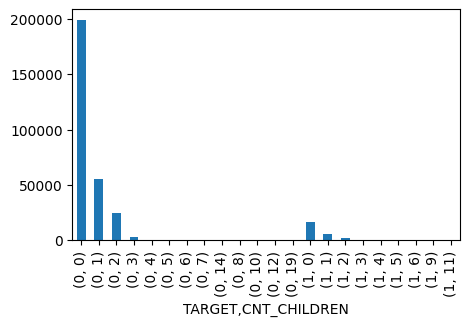

In [377]:
file2.groupby("TARGET")["CNT_CHILDREN"].value_counts().plot.bar(figsize=(5,3))

<Axes: xlabel='TARGET,FLAG_EMAIL'>

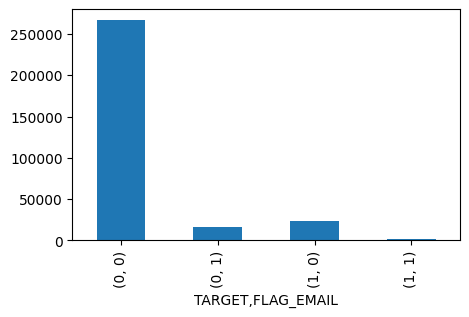

In [378]:
file2.groupby("TARGET")["FLAG_EMAIL"].value_counts().plot.bar(figsize=(5,3))

In [405]:
# leaving the null values of count variable as it means the consumer has applied for the firtst time 

In [407]:
file2.COUNT.isnull().sum()/file2.shape[0]*100

46.80027706325953

In [408]:
# the null values implies that the number of people who applied for the loans first time is 46 %

In [409]:
# number of times a consumer has applied for loans 
file2.groupby("TARGET").COUNT.describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,149995.0,4.931794,3.645151,1.0,2.5,4.0,6.250000,77.0
1,13600.0,4.943224,3.588597,1.0,2.5,4.0,6.333333,59.0


**---------------------------------------------THE END -----------------------------------------------------------------------**